## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#Read files:
data = pd.read_csv("flights_cleaned.csv", low_memory=False)
data.head()

Unnamed: 0     fl_date mkt_unique_carrier op_unique_carrier tail_num  \
0           0  2018-01-01                 B6                B6   N368JB   
1           1  2018-01-01                 DL                9E   N931XJ   
2           2  2018-01-01                 DL                9E   N916XJ   
3           3  2018-01-01                 DL                9E   N937XJ   
4           4  2018-01-01                 DL                9E   N316PQ   

   op_carrier_fl_num  origin_airport_id origin origin_city_name  \
0                356              12264    IAD   Washington, DC   
1               3507              10431    AVL    Asheville, NC   
2               3508              11433    DTW      Detroit, MI   
3               3512              14122    PIT   Pittsburgh, PA   
4               3513              10397    ATL      Atlanta, GA   

   dest_airport_id  ... crs_elapsed_time flights  distance  carrier_delay  \
0            10721  ...             91.0     1.0     413.0            0.0   
1            10397  ...             69.0     1.0     164.0           27.0   
2            14122  ...             78.0     1.0     201.0            0.0   
3            11433  ...             85.0     1.0     201.0            0.0   
4            11995  ...             78.0     1.0     306.0            0.0   

  weather_delay nas_delay  security_delay  late_aircraft_delay  crs_dep_time  \
0           0.0       0.0             0.0                  0.0          1843   
1           0.0      22.0             0.0                  0.0           615   
2           0.0       0.0             0.0                  0.0          1200   
3           0.0      15.0             0.0                  0.0          1330   
4           0.0       0.0             0.0                  0.0          1500   

   Total_delay_time  
0               0.0  
1              49.0  
2               0.0  
3              15.0  
4               0.0  

[5 rows x 33 columns]

In [49]:
sorted(data)

['Total_delay_time',
 'Unnamed: 0',
 'arr_delay',
 'cancellation_code',
 'cancelled',
 'carrier_delay',
 'crs_arr_time',
 'crs_dep_time',
 'crs_elapsed_time',
 'dep_delay',
 'dest',
 'dest_airport_id',
 'dest_city_name',
 'distance',
 'diverted',
 'dup',
 'fl_date',
 'flights',
 'late_aircraft_delay',
 'mkt_unique_carrier',
 'nas_delay',
 'op_carrier_fl_num',
 'op_unique_carrier',
 'origin',
 'origin_airport_id',
 'origin_city_name',
 'security_delay',
 'tail_num',
 'taxi_in',
 'taxi_out',
 'weather_delay',
 'wheels_off',
 'wheels_on']

In [3]:
data2 =  pd.read_csv("flights_raw.csv", low_memory=False)
data2.head()

Unnamed: 0     fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0           0  2018-01-01                 B6                 B6          B6   
1           1  2018-01-01                 DL       DL_CODESHARE          DL   
2           2  2018-01-01                 DL       DL_CODESHARE          DL   
3           3  2018-01-01                 DL       DL_CODESHARE          DL   
4           4  2018-01-01                 DL       DL_CODESHARE          DL   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                 356                B6   N368JB                356   
1                3507                9E   N931XJ               3507   
2                3508                9E   N916XJ               3508   
3                3512                9E   N937XJ               3512   
4                3513                9E   N316PQ               3513   

   origin_airport_id  ... distance carrier_delay  weather_delay nas_delay  \
0              12264  ...    413.0           NaN            NaN       NaN   
1              10431  ...    164.0          27.0            0.0      22.0   
2              11433  ...    201.0           NaN            NaN       NaN   
3              14122  ...    201.0           0.0            0.0      15.0   
4              10397  ...    306.0           NaN            NaN       NaN   

  security_delay  late_aircraft_delay  first_dep_time  total_add_gtime  \
0            NaN                  NaN             NaN              NaN   
1            0.0                  0.0             NaN              NaN   
2            NaN                  NaN             NaN              NaN   
3            0.0                  0.0             NaN              NaN   
4            NaN                  NaN             NaN              NaN   

   longest_add_gtime  extra_col  
0                NaN        NaN  
1                NaN        NaN  
2                NaN        NaN  
3                NaN        NaN  
4                NaN        NaN  

[5 rows x 43 columns]

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

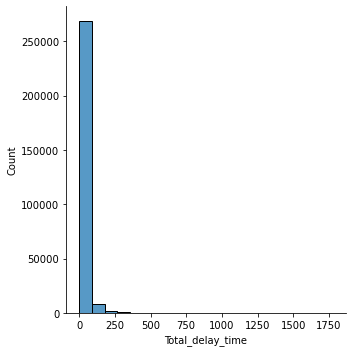

In [6]:
sns.displot(data['Total_delay_time'])

In [26]:
data_filtered = data[data['arr_delay'] <400 ]

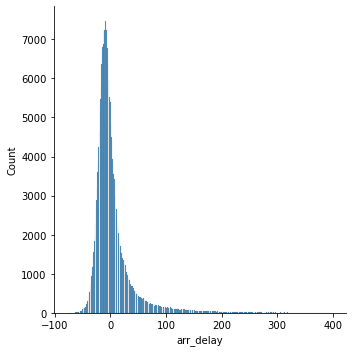

In [13]:
sns.displot(data_filtered['arr_delay'])

In [77]:
adj_arr_delay = data[((data['arr_delay'] >= 1) & (data['arr_delay'] <= 400))] 



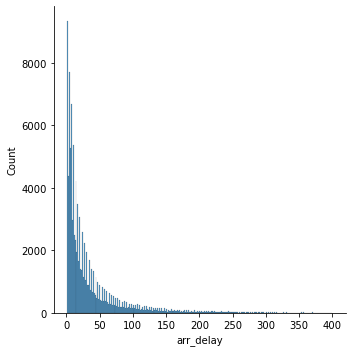

In [88]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8
p = sns.displot(data = adj_arr_delay['arr_delay'])
#sns.displot(adj_arr_delay['arr_delay'])

ValueError: Could not interpret value `arr_delay` for parameter `x`

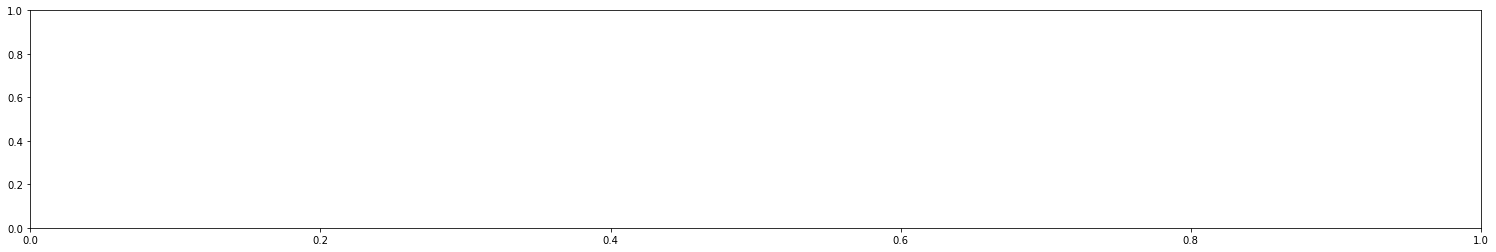

In [87]:
import matplotlib.pyplot as plt
fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.displot(x = "arr_delay", y = "count", ax=ax, data=adj_arr_delay['arr_delay'])

In [60]:
import plotly.express as px

hist_sample = adj_arr_delay

df = px.data.tips()
fig = px.histogram(
        hist_sample, 
        title='Total Flight Delays by Minutes',
        x="arr_delay",
        labels = {'total_delay':'Delay in Minutes'})
fig.show()


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [51]:
#create arrive and depart time of day columns
from datetime import datetime
data['arr_hour_of_day'] = data[data['crs_arr_time'].notna()].apply(
    lambda x: 0 if x['crs_arr_time'] == 2400.0 else datetime.strptime(str(int(x['crs_arr_time'])).zfill(4), '%H%M').time().hour, axis=1)
data['arr_hour_of_day'].head()

0    20
1     7
2    13
3    14
4    16
Name: arr_hour_of_day, dtype: int64

In [54]:
data['dep_hour_of_day'] = data[data['crs_dep_time'].notna()].apply(
    lambda x: 0 if x['crs_dep_time'] == 2400.0 else datetime.strptime(str(int(x['crs_dep_time'])).zfill(4), '%H%M').time().hour, axis=1)
data['dep_hour_of_day'].head()

0    18
1     6
2    12
3    13
4    15
Name: dep_hour_of_day, dtype: int64

In [55]:
#taxi in by hour
taxi_in_times_by_hour = data.groupby(
    'arr_hour_of_day').agg(avg_taxi_in=('taxi_in', 'median')).reset_index()
taxi_in_times_by_hour = taxi_in_times_by_hour.rename(columns={"arr_hour_of_day": "hour_of_day", "avg_taxi_in": "avg_taxi"}, errors="raise")
taxi_in_times_by_hour

hour_of_day  avg_taxi
0             0       5.0
1             1       5.0
2             2       5.0
3             3       5.0
4             4       6.0
5             5       6.0
6             6       7.0
7             7       7.0
8             8       7.0
9             9       6.0
10           10       6.0
11           11       6.0
12           12       6.0
13           13       6.0
14           14       6.0
15           15       6.0
16           16       6.0
17           17       6.0
18           18       6.0
19           19       7.0
20           20       6.0
21           21       6.0
22           22       5.0
23           23       5.0

In [56]:
#taxi out by hour
taxi_out_times_by_hour = data.groupby(
    'dep_hour_of_day').agg(avg_taxi_out=('taxi_out', 'median')).reset_index()
taxi_out_times_by_hour = taxi_out_times_by_hour.rename(columns={"dep_hour_of_day": "hour_of_day", "avg_taxi_out": "avg_taxi"}, errors="raise")
taxi_out_times_by_hour

hour_of_day  avg_taxi
0             0      14.0
1             1      12.0
2             2      12.0
3             3      13.0
4             4      10.0
5             5      15.0
6             6      16.0
7             7      16.0
8             8      17.0
9             9      16.0
10           10      15.0
11           11      15.0
12           12      14.0
13           13      14.0
14           14      14.0
15           15      14.0
16           16      14.0
17           17      15.0
18           18      15.0
19           19      14.0
20           20      16.0
21           21      15.0
22           22      15.0
23           23      14.0

In [57]:
#combine taxi times
taxi_times_by_hour = taxi_in_times_by_hour.append(taxi_out_times_by_hour, ignore_index=True)
taxi_times_by_hour = taxi_times_by_hour.groupby(
    'hour_of_day').agg(avg_taxi=('avg_taxi', 'median')).reset_index()
taxi_times_by_hour

hour_of_day  avg_taxi
0             0       9.5
1             1       8.5
2             2       8.5
3             3       9.0
4             4       8.0
5             5      10.5
6             6      11.5
7             7      11.5
8             8      12.0
9             9      11.0
10           10      10.5
11           11      10.5
12           12      10.0
13           13      10.0
14           14      10.0
15           15      10.0
16           16      10.0
17           17      10.5
18           18      10.5
19           19      10.5
20           20      11.0
21           21      10.5
22           22      10.0
23           23       9.5

In [59]:
fig = px.bar(taxi_times_by_hour, 
             title='Average Hourly Taxi Time',
             x='hour_of_day', 
             y='avg_taxi',
             labels = {'avg_taxi': 'Taxiing Time Minutes', 'hour_of_day':'Hour of Day (24 hours)'})
fig.show()


In [61]:
#Overlay with number of flights
num_flights_by_hour = data.groupby(
    'arr_hour_of_day').agg(num_flights=('flights', 'count')).reset_index()
num_flights_by_hour.rename(columns = {'arr_hour_of_day':'hour_of_day'}, inplace = True)

In [64]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=taxi_times_by_hour['hour_of_day'],
        y=taxi_times_by_hour['avg_taxi'],
        name='Average Hourly Taxiing Time',
        marker_color="blue"
    ),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
        x=num_flights_by_hour['hour_of_day'],
        y=num_flights_by_hour['num_flights'],
        name='Number of Flights',
        marker_color="black"
    ),
    secondary_y=True
)


fig.update_layout(
    title="Taxi Times per Hour vs Flight Counts per Hour",
    xaxis_title="Hour of Day (24 hour)")

fig.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [65]:
#Get plane speed vs flight delay
data['flight_speed'] = data.apply(
    lambda x: ((x['distance'] / (x['crs_elapsed_time']/60)
              )),  axis=1)
data.head()

Unnamed: 0     fl_date mkt_unique_carrier op_unique_carrier tail_num  \
0           0  2018-01-01                 B6                B6   N368JB   
1           1  2018-01-01                 DL                9E   N931XJ   
2           2  2018-01-01                 DL                9E   N916XJ   
3           3  2018-01-01                 DL                9E   N937XJ   
4           4  2018-01-01                 DL                9E   N316PQ   

   op_carrier_fl_num  origin_airport_id origin origin_city_name  \
0                356              12264    IAD   Washington, DC   
1               3507              10431    AVL    Asheville, NC   
2               3508              11433    DTW      Detroit, MI   
3               3512              14122    PIT   Pittsburgh, PA   
4               3513              10397    ATL      Atlanta, GA   

   dest_airport_id  ... carrier_delay weather_delay  nas_delay  \
0            10721  ...           0.0           0.0        0.0   
1            10397  ...          27.0           0.0       22.0   
2            14122  ...           0.0           0.0        0.0   
3            11433  ...           0.0           0.0       15.0   
4            11995  ...           0.0           0.0        0.0   

   security_delay late_aircraft_delay crs_dep_time  Total_delay_time  \
0             0.0                 0.0         1843               0.0   
1             0.0                 0.0          615              49.0   
2             0.0                 0.0         1200               0.0   
3             0.0                 0.0         1330              15.0   
4             0.0                 0.0         1500               0.0   

   arr_hour_of_day  dep_hour_of_day  flight_speed  
0               20               18    272.307692  
1                7                6    142.608696  
2               13               12    154.615385  
3               14               13    141.882353  
4               16               15    235.384615  

[5 rows x 36 columns]

In [67]:
flights_completed = data[(
    (data['cancelled'] == 0) & (data['diverted'] == 0)
)]

plot_sample = flights_completed.sample(frac=0.015)


fig = go.Figure(data=[go.Scatter(
    x=plot_sample['flight_speed'],
    y=plot_sample['dep_delay'],
    mode='markers',
    marker_size=np.full((19569), 5.5))    
])

fig.update_layout(
    title="Flights Delays and Flight Speeds",
    xaxis_title="Flight Speed (Miles per Hour)",
    yaxis_title="Flight Departure Delay (Minutes)"
)
fig.show()

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [89]:
cities_origin = data[['origin_city_name','origin_airport_id']]
cities_dest = data[['dest_city_name','dest_airport_id']]
cities_origin.rename(columns = {'origin_city_name':'city_state', 'origin_airport_id':'airport_id'}, inplace = True)
cities_dest.rename(columns = {'dest_city_name':'city_state', 'dest_airport_id':'airport_id'}, inplace = True)
airport_cities = cities_origin
airport_cities = airport_cities.append(cities_dest, ignore_index=True)

# Use only unique pairs of aiport id and city_state?
#airport_cities = airport_cities.drop_duplicates()

airport_cities['state'] = airport_cities.apply(
    lambda x: (x['city_state'].split(",")[1].strip()), axis=1)   
airport_cities['city'] = airport_cities.apply(
    lambda x: (x['city_state'].split(",")[0].strip()), axis=1)
airport_cities.head()

/Users/donmiller/Downloads/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



city_state  airport_id state        city
0  Washington, DC       12264    DC  Washington
1   Asheville, NC       10431    NC   Asheville
2     Detroit, MI       11433    MI     Detroit
3  Pittsburgh, PA       14122    PA  Pittsburgh
4     Atlanta, GA       10397    GA     Atlanta

In [93]:
data['state'] = airport_cities['state']

In [108]:
flights_by_state_count = data[['flights','state']].groupby('state').count().reset_index()
flights_by_state_count.sort_values(by='flights', ascending=False).head(10)


state  flights
44    TX       25
4     CA       22
8     FL       19
0     AK       17
33    NY       16
21    MI       15
13    IL       10
26    NC       10
5     CO       10
37    PA        9

In [113]:
cities_origin2 = data[['origin_city_name','origin_airport_id']]
cities_dest2 = data[['dest_city_name','dest_airport_id']]
cities_origin2.rename(columns = {'origin_city_name':'city_state', 'origin_airport_id':'airport_id'}, inplace = True)
cities_dest2.rename(columns = {'dest_city_name':'city_state', 'dest_airport_id':'airport_id'}, inplace = True)



airport_cities2 = cities_origin2
airport_cities2 = airport_cities2.append(cities_dest, ignore_index=True)


airport_cities2['state'] = airport_cities2.apply(
    lambda x: (x['city_state'].split(",")[1].strip()), axis=1)   
airport_cities2['city'] = airport_cities2.apply(
    lambda x: (x['city_state'].split(",")[0].strip()), axis=1)
airport_cities2.head()

/Users/donmiller/Downloads/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



city_state  airport_id state        city
0  Washington, DC       12264    DC  Washington
1   Asheville, NC       10431    NC   Asheville
2     Detroit, MI       11433    MI     Detroit
3  Pittsburgh, PA       14122    PA  Pittsburgh
4     Atlanta, GA       10397    GA     Atlanta

In [114]:
flights_by_state_count2 = data[['flights','state']].groupby('state').count().reset_index()
flights_by_state_count2.sort_values(by='flights', ascending=False).head(10)

state  flights
44    TX       25
4     CA       22
8     FL       19
0     AK       17
33    NY       16
21    MI       15
13    IL       10
26    NC       10
5     CO       10
37    PA        9

In [95]:
fig = go.Figure(data=go.Choropleth(
    locations=flights_by_state_count['state'], # Spatial coordinates
    z = flights_by_state_count['flights'].astype(int), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Number of Flights",
))

fig.update_layout(
    title_text = 'Number of Flights by Airport',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


In [ ]:
flights_by_state_count2 = data[['flights','state']].groupby('state').count().reset_index()
flights_by_state_count2.sort_values(by='flights', ascending=False).head(10)

In [127]:
#Get states for 50% of flight totals

total_flights = data[['flights', 'state']].groupby('state').sum().reset_index()

#total_flights = total_flights.set_index('state')
#total_flights.sort_values('flights', ascending=False, inplace=True)
total_flights.sort_values(by='flights', ascending=False).head(10)

state  flights
44    TX     25.0
4     CA     22.0
8     FL     19.0
0     AK     17.0
33    NY     16.0
21    MI     15.0
13    IL     10.0
26    NC     10.0
5     CO     10.0
37    PA      9.0

In [128]:
cumsums = total_flights.cumsum()
total_flights['cumulative_flights'] = cumsums

total_flights = total_flights.reset_index()
total_flights.head(10)

ValueError: Wrong number of items passed 2, placement implies 1

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?